In [192]:
# Read-in imdb data
import csv

movies = {}

with open('imdb_dataset_v7.2_6_actors_complete.tsv') as csvfile:
    reader = csv.DictReader(csvfile, delimiter = "\t")
    for entry in reader:
        movies[
            entry["title"]
        ] = {
        "director":     entry["director"],
        "rating":       entry["rating"],
        "votes":        entry["votes"],
        "year":         entry["year"],
        "genre":        entry["genre"],
        "gross":        entry["gross"],
        "budget":       entry["budget"],
        "run-time":     entry["run-time"] ,
        "actor1":       entry["actor1"],
        "actor1_rank":  entry["actor1_rank"],
        "actor1_sex":   entry["actor1_sex"],
        "actor2":       entry["actor2"],
        "actor2_rank":  entry["actor2_rank"],
        "actor2_sex":   entry["actor2_sex"],
        "actor3":       entry["actor3"],
        "actor3_rank":  entry["actor3_rank"],
        "actor3_sex":   entry["actor3_sex"],
        "actor4":       entry["actor4"],
        "actor4_rank":  entry["actor4_rank"],
        "actor4_sex":   entry["actor4_sex"],
        "actor5":       entry["actor5"],
        "actor5_rank":  entry["actor5_rank"],
        "actor5_sex":   entry["actor5_sex"],
        "actor6":       entry["actor6"],
        "actor6_rank":  entry["actor6_rank"],
        "actor6_sex":   entry["actor6_sex"],
        "plot":         entry["plot"]
        }

In [193]:
# List of terms associated with movie script writing
movie_scripts_terms = ['written', 'writer', 'int', 'ext', 'day', 'night', 'morning',
                       'evening', 'fade', 'cut', 'continued', 'cont', 'continuing',
                       'toward', 'towards', 'overlapping', 'screentalk', 'screen',
                       'talk', 'offscreen', 'pan', 'pans', 'tilt', 'tilts', 'camera',
                       'movie', 'film', 'gesture', 'gesturing']

In [194]:
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# Function for getting tokens from text
def tokens(text):
    # Remove numbers
    no_numbers = re.sub(r'\d+(\.\d+)?', '', text)

    # Remove punctuations and tokenize
    tokens_rm_punct = RegexpTokenizer(r'\w+')
    tokens_without_punct = tokens_rm_punct.tokenize(no_numbers)
    
    # Remove word that have capital letters
    no_starting_capital_letters = []
    for word in tokens_without_punct:
        if(word[0].isupper() == False):
            no_starting_capital_letters.append(word)

    # Remove stop words
    no_stop_words = [word for word in no_starting_capital_letters if word not in stopwords.words('english')]
    
    # Remove terms associated with movie script writing
    no_movie_script_terms = [word for word in no_stop_words if word not in movie_scripts_terms]
    
    # Remove words that have less than 2 characters
    filtered_words = [word for word in no_movie_script_terms if len(word) > 2]

    return filtered_words

In [195]:
import os
import io

# Read-in movie scripts and add words to a dictonary of tokens
path = './scripts/'

scripts_tokens = {}
for filename in os.listdir(path):
    if("." in filename[-5:]):
        # Replace '.' when it appears after the year in filenames with '/' to match the imdb dataset
        correct_movie_name = filename.replace(".", "/")
        
        f = io.open(path + filename, 'r', encoding='utf8')
        scripts_tokens[correct_movie_name] = tokens(f.read())
    else:
        f = io.open(path + filename, 'r', encoding='utf8')
        scripts_tokens[filename] = tokens(f.read())

In [196]:
import csv

# Go through the data Data_Set_S1.txt and list words and their happiness average into a dictonary
word_sentiment_dic = {}
with open('./Data_Set_S1.txt', 'r') as f:
    # Skip the headers
    lines_after_3 = f.readlines()[3:]
    reader = csv.reader(lines_after_3, delimiter='\t')
    for row in reader:
        word = row[0]
        happiness_avg = row[2]
        word_sentiment_dic[word] = happiness_avg

In [197]:
def get_sentiment_values(tokens):
    tokens_happiness_avg = []
    #tokens_happiness_avg = {}
    for word in tokens:
        # Add to list if the word is found, otherwise not
        if(word in word_sentiment_dic):
            tokens_happiness_avg.append(float(word_sentiment_dic[word]))
            #tokens_happiness_avg[word] = float(word_sentiment_dic[word])
    return tokens_happiness_avg

In [198]:
import numpy as np

# Get sentiment value for each token from the scripts
movie_scripts_sentiment = {}
for movie in scripts_tokens:
    movie_scripts_sentiment[movie] = get_sentiment_values(scripts_tokens[movie])

In [199]:
# Get average sentiment value for each script
movie_scripts_sentiment_avg = {}
for movie in movie_scripts_sentiment:
    movie_scripts_sentiment_avg[movie] = np.average(movie_scripts_sentiment[movie])

In [200]:
import operator

# Top-10 negative movie scripts based on sentiment analysis
movie_scripts_sentiment_avg_sorted = sorted(movie_scripts_sentiment_avg.items(), key=operator.itemgetter(1))
print "Top-10 negative movie scripts based on sentiment analysis"
for i in movie_scripts_sentiment_avg_sorted[:10]:
    print(str(i[0]) + ": " + str(i[1]))

Top-10 negative movie scripts based on sentiment analysis
Army of Darkness (1992): 5.31525757576
Platoon (1986): 5.32206329951
The Crow (1994): 5.32211348684
Basic (2003): 5.33211344336
Day of the Dead (2008) (V): 5.33463873626
Saw (2004): 5.33751343932
Tremors (1990): 5.3418790443
Judge Dredd (1995): 5.34603737338
Soldier (1998/I): 5.34659166583
Blade II (2002): 5.34694065162


In [201]:
# Top-10 positive movie scripts based on sentiment analysis
movie_scripts_sentiment_avg_sorted = sorted(movie_scripts_sentiment_avg.items(), key=operator.itemgetter(1), reverse=True)
print "Top-10 positive movie scripts based on sentiment analysis"
for i in movie_scripts_sentiment_avg_sorted[:10]:
    print(str(i[0]) + ": " + str(i[1]))

Top-10 positive movie scripts based on sentiment analysis
Midnight in Paris (2011): 5.80318045862
Bridesmaids (2011/I): 5.75815061203
The Perks of Being a Wallflower (2012): 5.75303769046
Clueless (1995): 5.74288487832
Sex and the City (2008): 5.74161941964
The Bling Ring (2013): 5.73512627291
Saving Mr. Banks (2013): 5.73458253003
The Family Man (2000): 5.73050610628
Music of the Heart (1999): 5.72940391224
Peggy Sue Got Married (1986): 5.72683992259


In [202]:
from collections import defaultdict

# Add sentiment scores to each director
movie_scripts_directors_sentiments = defaultdict(list)
for movie in scripts_tokens:
    movie_scripts_directors_sentiments[movies[movie]["director"]].append(movie_scripts_sentiment_avg[movie])

In [203]:
# Calculate the average sentiment score for each director
movie_scripts_directors_sentiment_avg = {}
for director, sentiment_scores in movie_scripts_directors_sentiments.iteritems():
    # Disclude directors who have directed 2 movies or less
    if(len(sentiment_scores) > 2):
        movie_scripts_directors_sentiment_avg[director] = np.average(sentiment_scores)

In [204]:
# Top-10 negative directors based on sentiment analysis
movie_scripts_directors_sentiment_avg_sorted = sorted(movie_scripts_directors_sentiment_avg.items(), key=operator.itemgetter(1))
print "Top-10 negative directors based on sentiment analysis"
for i in movie_scripts_directors_sentiment_avg_sorted[:10]:
    print(str(i[0]) + ": " + str(i[1]))

Top-10 negative directors based on sentiment analysis
Alex Proyas: 5.38538545141
John McTiernan: 5.39949320603
Renny Harlin: 5.40513683052
Guillermo del Toro: 5.40923648367
Paul W.S. Anderson: 5.42033460888
Michael (I) Bay: 5.44635840041
Sam Raimi: 5.44659580176
Paul (I) Verhoeven: 5.45136034171
Ron (I) Howard: 5.45377046276
Guy Ritchie: 5.4562533964


In [205]:
# Top-10 positive directors based on sentiment analysis
movie_scripts_directors_sentiment_avg_sorted = sorted(movie_scripts_directors_sentiment_avg.items(), key=operator.itemgetter(1), reverse=True)
print "Top-10 positive directors based on sentiment analysis"
for i in movie_scripts_directors_sentiment_avg_sorted[:10]:
    print(str(i[0]) + ": " + str(i[1]))

Top-10 positive directors based on sentiment analysis
Cameron (I) Crowe: 5.70082266725
Woody Allen: 5.68673391417
James L. Brooks: 5.65280563364
Bennett (I) Miller: 5.63250851221
Paul Thomas (I) Anderson: 5.60362698178
Jonathan Demme: 5.59856968488
Henry Selick: 5.59515200213
Robert Zemeckis: 5.5728983279
Anthony Minghella: 5.56647112957
Brett Ratner: 5.56450542717


In [206]:
actors_list = ["actor1", "actor2", "actor3", "actor4", "actor5", "actor6"]

# Add sentiment scores to each actor
movie_scripts_actors_sentiments = defaultdict(list)
for movie in scripts_tokens:
    for actor in actors_list:
        movie_scripts_actors_sentiments[movies[movie][actor]].append(movie_scripts_sentiment_avg[movie])

In [207]:
# Calculate the average sentiment score for each actor
movie_scripts_actors_sentiment_avg = {}
for actor, sentiment_scores in movie_scripts_actors_sentiments.iteritems():
    # Disclude actors who have appeared in 2 movies or less
    if(len(sentiment_scores) > 2):
        movie_scripts_actors_sentiment_avg[actor] = np.average(sentiment_scores)

In [208]:
# Top-10 negative actors based on sentiment analysis
movie_scripts_actors_sentiment_avg_sorted = sorted(movie_scripts_actors_sentiment_avg.items(), key=operator.itemgetter(1))
print "Top-10 negative actors based on sentiment analysis"
for i in movie_scripts_actors_sentiment_avg_sorted[:10]:
    print(str(i[0]) + ": " + str(i[1]))

Top-10 negative actors based on sentiment analysis
Forest Whitaker: 5.38696512673
David Morse: 5.3943744673
Tom Savini: 5.40530097627
John Leguizamo: 5.42322665994
Taye Diggs: 5.42650666406
Ron Perlman: 5.42739500389
Ben Foster: 5.42829341784
Ewen Bremner: 5.42908744838
Courteney Cox: 5.43081948785
Jason Isaacs: 5.4314803348


In [209]:
# Top-10 positive actors based on sentiment analysis
movie_scripts_actors_sentiment_avg_sorted = sorted(movie_scripts_actors_sentiment_avg.items(), key=operator.itemgetter(1), reverse=True)
print "Top-10 positive actors based on sentiment analysis"
for i in movie_scripts_actors_sentiment_avg_sorted[:10]:
    print(str(i[0]) + ": " + str(i[1]))

Top-10 positive actors based on sentiment analysis
Garry Marshall: 5.68252372542
Anthony Michael Hall: 5.68216562581
Joan Cusack: 5.67676420784
Michael Sheen: 5.67045527413
Paul Rudd: 5.66780866284
Olivia Thirlby: 5.66609008895
Jim Cummings: 5.66587103372
Bradley Whitford: 5.66212769672
Zach Galifianakis: 5.65795444584
Alan Arkin: 5.65774269792


In [210]:
# Add genre to each movie
movie_scripts_genres = defaultdict(list)
for movie in scripts_tokens:
    movie_scripts_genres[movie].append(movies[movie]["genre"])

In [211]:
# Get list of movies for each genre
movie_scripts_genres = defaultdict(list)
for movie in scripts_tokens:
    movie_scripts_genres[movies[movie]["genre"]].append(movie)

In [212]:
from collections import Counter

# Add number of movie scripts in each genre to a dict
genre_num_of_scripts = {}
for genre in movie_scripts_genres:
    genre_num_of_scripts[genre] = len(movie_scripts_genres[genre])
    
# Sort by number of movie scripts
genre_num_of_scripts_sorted = sorted(genre_num_of_scripts.items(), key=operator.itemgetter(1), reverse=True)

print "Number of movie scipts in a genre"
for i in genre_num_of_scripts_sorted:
    print(str(i[0]) + ": " + str(i[1]))

Number of movie scipts in a genre
Action: 184
Comedy: 144
Drama: 102
Crime: 65
Adventure: 48
Biography: 45
Horror: 31
Mystery: 10
Animation: 6
Fantasy: 4
Sci-Fi: 1
Romance: 1


In [213]:
# Count how often a token appears in a specific genre (tf values)
def tokens_tf_genre(tokens_genre):
    movie_scripts_genre_tokens = []
    for movie in tokens_genre:
        movie_scripts_genre_tokens += scripts_tokens[movie]

    tokens_counter = Counter(movie_scripts_genre_tokens)
    # Combine list of keys and values
    tokens_tf = zip(tokens_counter.keys(), tokens_counter.values())
    # Delete duplicates and sort
    tokens_tf_sorted = sorted(set(tokens_tf))
    return tokens_tf_sorted

In [214]:
import math

# Calculate idf values for each word in a genre
def tokens_idf_genre(tokens_genre):
    # Get get every word in the corpus (all movies)
    total_word_list = []
    for movie in tokens_genre:
        # Delete duplicated tokens from every movie script
        total_word_list += set(scripts_tokens[movie])
        
    # Count how often a token appears in a corpus for a genre
    # (equals to how many movie scripts that token is in)
    total_word_list_count = Counter(total_word_list)
   
    # Delete duplicates and sort
    total_word_list_sorted = sorted(set(total_word_list))
    
    
    idf_values = []
    for token in total_word_list_sorted:
        # log(Total number of articles / how many documents have that token)
        idf_value = math.log(len(tokens_genre)/float(total_word_list_count[token]))
        idf_values.append(idf_value)
    
    # Combine list of keys and values
    tokens_idf = zip(total_word_list_sorted, idf_values)
    return tokens_idf

In [215]:
# Calculate tf-idf values for each word in a genre
def tokens_tfidf_genre(tokens_tf, tokens_idf):
    # Unzip lists to get values
    tokens_tf, values_tf = zip(*tokens_tf)
    tokens_idf, values_idf = zip(*tokens_idf)
    # Multiply tf and idf values
    tokens_tfidf_values = [a*b for a, b in zip(values_tf, values_idf)]
    # Combine list of keys and values
    tokens_tfidf = zip(tokens_tf, tokens_tfidf_values)
    return tokens_tfidf

In [216]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# Function for creating a Wordcloud image
def wordcloud_image(tfidf):
    wordcloud_text = ""
    for i in tfidf:
        num_of_repeats = int(round(i[1]))
        wordcloud_text += (num_of_repeats * (i[0] + " "))
        
    wordcloud = WordCloud(width=1600, height=800).generate(wordcloud_text)
    plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [217]:
# Creates Wordcloud image by using tf-idf
def wordcloud_tfidf(name_of_genre):
    name_of_genre_tf = tokens_tf_genre(movie_scripts_genres[name_of_genre])
    name_of_genre_idf = tokens_idf_genre(movie_scripts_genres[name_of_genre])
    name_of_genre_tfidf = tokens_tfidf_genre(name_of_genre_tf, name_of_genre_idf)
    
    print("Number of movie scripts in genre: " + str(len(movie_scripts_genres[name_of_genre])))
    print("Movie scripts represented in the image: ")
    print(str(movie_scripts_genres[name_of_genre]))
    
    wordcloud_image(name_of_genre_tfidf)

Number of movie scripts in genre: 184
Movie scripts represented in the image: 
['Serenity (2005)', 'Pineapple Express (2008)', 'Defiance (2008/I)', 'Hanna (2011)', 'Tomorrow Never Dies (1997)', 'Brick (2005)', 'Looper (2012)', 'Eagle Eye (2008)', 'Conan the Barbarian (2011)', 'Predator (1987)', 'Day of the Dead (2008) (V)', 'Drive Angry (2011)', 'Resident Evil (2002)', 'Fair Game (1995)', 'Hellboy (2004)', 'Three Kings (1999)', 'The Time Machine (2002)', 'Independence Day (1996)', 'Reindeer Games (2000)', 'Sherlock Holmes (2009)', 'Miami Vice (2006)', 'Saving Private Ryan (1998)', 'Deep Rising (1998)', 'Terminator Salvation (2009)', 'RocknRolla (2008)', 'Land of the Dead (2005)', 'Ronin (1998)', "Smokin' Aces (2006)", 'The Avengers (1998)', 'Hard Rain (1998)', '9 (2009/I)', 'Die Hard (1988)', 'Basic (2003)', 'Ninja Assassin (2009)', 'Absolute Power (1997)', 'Cradle 2 the Grave (2003)', 'Darkman (1990)', 'The Bourne Ultimatum (2007)', 'How to Train Your Dragon (2010)', 'Rush Hour (1998)

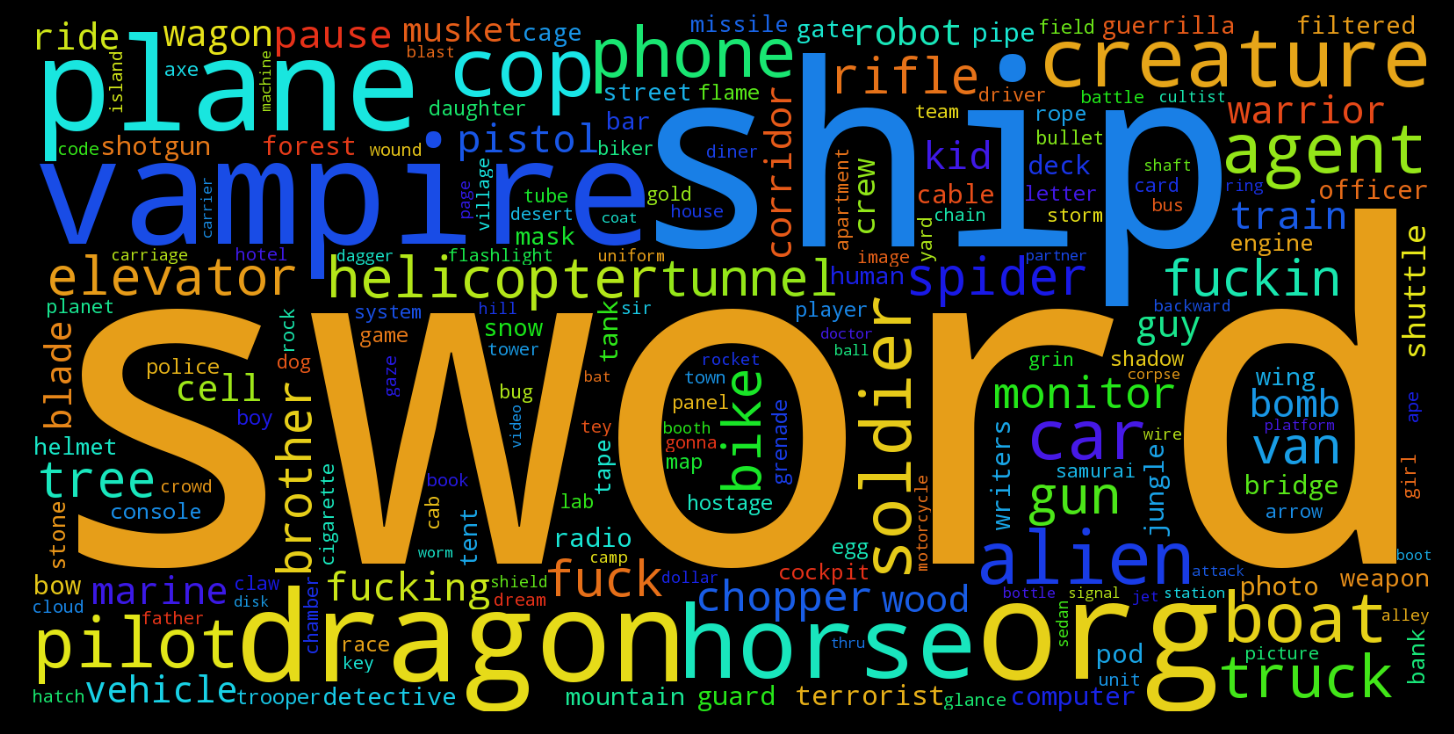

In [218]:
# Wordcloud image for Action genre
wordcloud_tfidf("Action")

Number of movie scripts in genre: 144
Movie scripts represented in the image: 
['Drop Dead Gorgeous (1999)', 'In the Loop (2009)', 'Very Bad Things (1998)', 'Being Human (1994)', 'Tin Men (1987)', 'Drag Me to Hell (2009)', 'Extract (2009)', 'The Kids Are All Right (2010)', 'Synecdoche, New York (2008)', "My Best Friend's Wedding (1997)", 'New York Minute (2004/I)', 'Garden State (2004)', 'Pretty Woman (1990)', 'Silver Linings Playbook (2012)', 'Barton Fink (1991)', "Henry's Crime (2010)", 'Detroit Rock City (1999)', 'Analyze That (2002)', 'Tremors (1990)', 'American Pie (1999)', "You've Got Mail (1998)", 'Manhattan Murder Mystery (1993)', 'Runaway Bride (1999)', 'Intolerable Cruelty (2003)', 'Juno (2007)', 'Freaked (1993)', 'The Ladykillers (2004)', 'The Mask (1994)', 'Larry Crowne (2011)', 'Raising Arizona (1987)', 'Horrible Bosses (2011)', 'Big (1988)', 'Hesher (2010)', 'Superbad (2007)', 'The American President (1995)', 'Living in Oblivion (1995)', 'No Strings Attached (2011/I)', "I

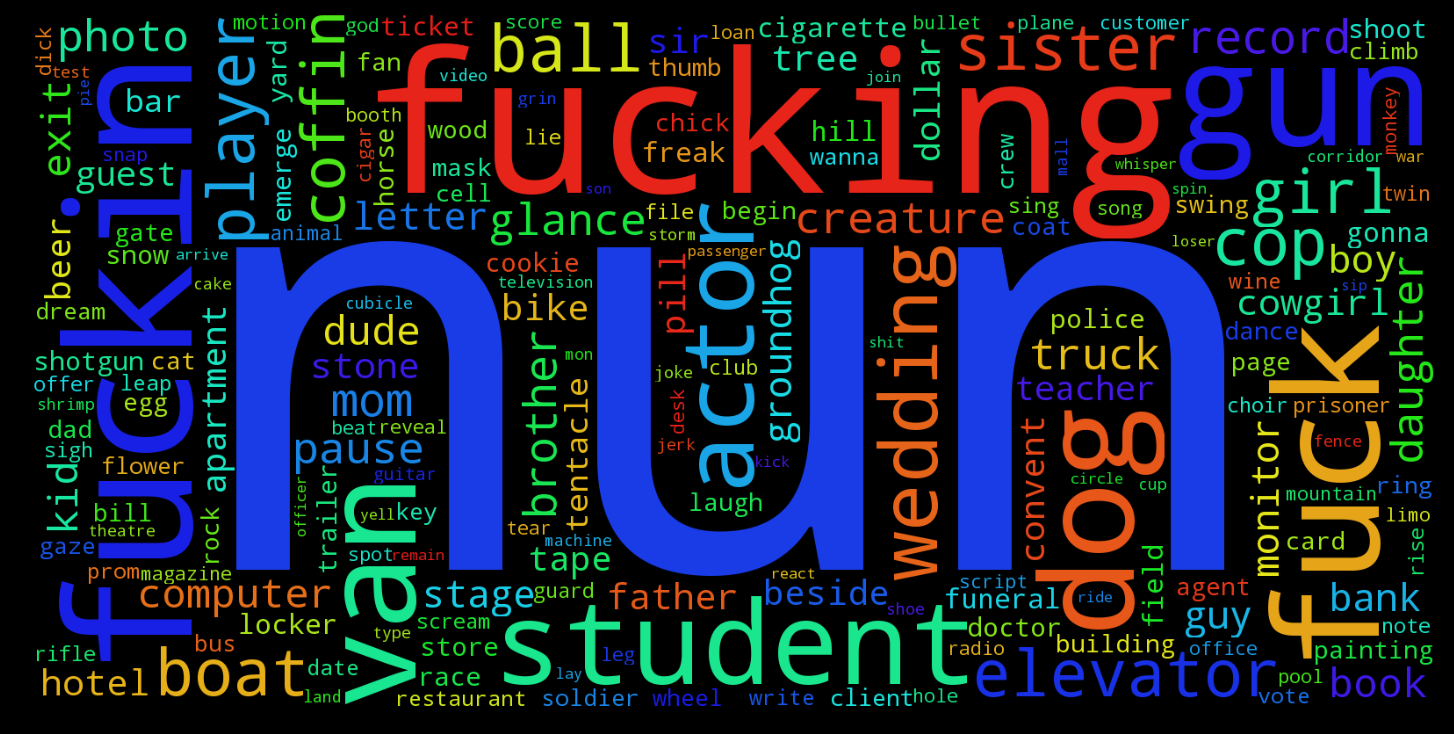

In [219]:
# Wordcloud image for Comedy genre
wordcloud_tfidf("Comedy")

Number of movie scripts in genre: 102
Movie scripts represented in the image: 
['War Horse (2011)', 'Constantine (2005)', 'Water for Elephants (2011)', 'Remember Me (2010)', 'Zero Dark Thirty (2012)', "Jacob's Ladder (1990/I)", 'The Roommate (2011/I)', 'Martha Marcy May Marlene (2011)', 'Kafka (1991)', 'Black Swan (2010)', 'Meet Joe Black (1998)', 'Mud (2012)', 'Up in the Air (2009/I)', 'Edward Scissorhands (1990)', 'Anna Karenina (1997)', 'Flight (2012/I)', 'Angel Eyes (2001)', 'Take Shelter (2011)', "All the King's Men (2006)", 'The Perks of Being a Wallflower (2012)', 'After.Life (2009)', 'Buried (2010)', 'Good Will Hunting (1997)', 'The Box (2009/I)', 'Platoon (1986)', 'Valkyrie (2008)', 'The Horse Whisperer (1998)', 'The Good Girl (2002)', 'The Wrestler (2008)', 'Body of Evidence (1993)', 'Django Unchained (2012)', 'Ghost (1990)', 'Sphere (1998)', 'Sling Blade (1996)', 'Trainspotting (1996)', 'Gattaca (1997)', 'Warrior (2011)', 'The Majestic (2001)', '12 and Holding (2005)', 'Amer

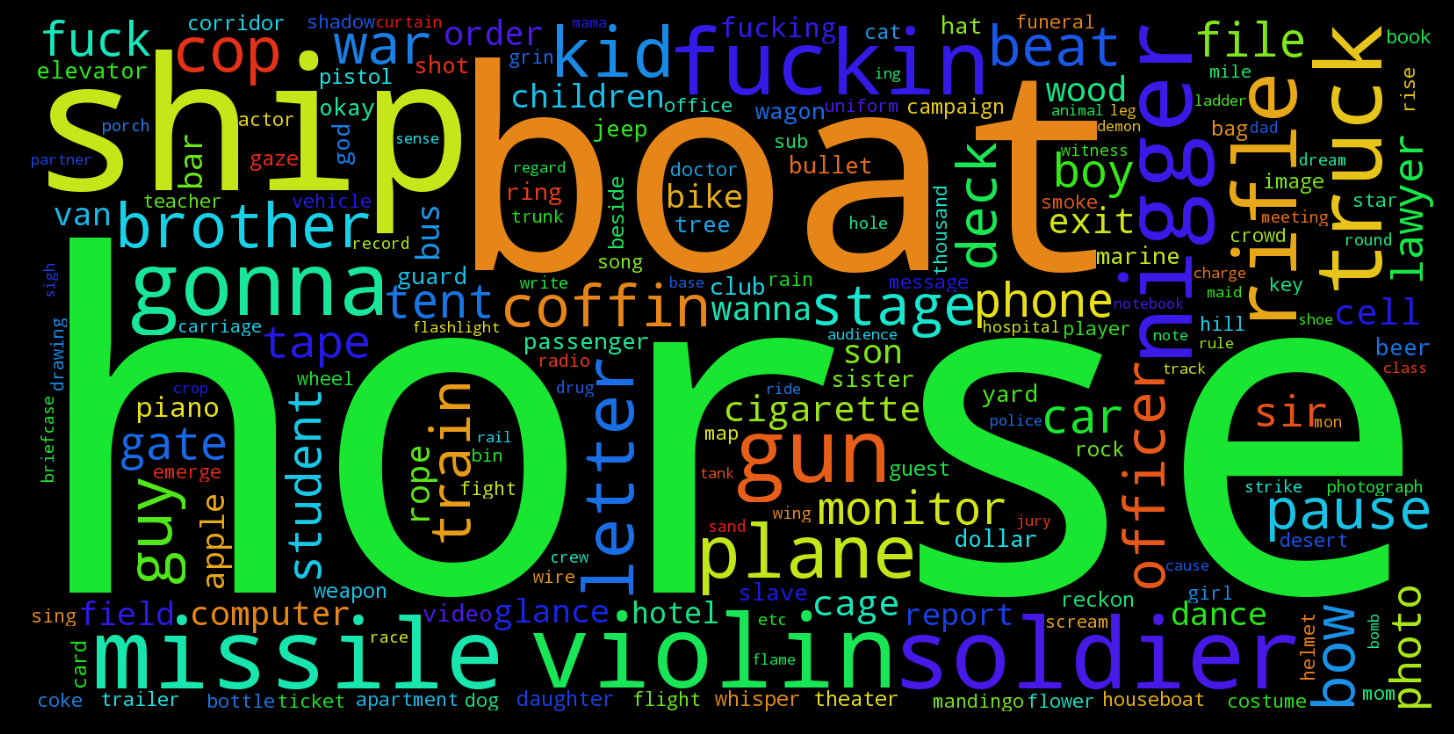

In [220]:
# Wordcloud image for Drama genre
wordcloud_tfidf("Drama")

Number of movie scripts in genre: 65
Movie scripts represented in the image: 
['Law Abiding Citizen (2009)', 'American History X (1998)', 'The Shawshank Redemption (1994)', 'Panic Room (2002)', 'Se7en (1995)', 'True Romance (1993)', 'American Psycho (2000)', 'Unknown (2006)', 'Misery (1990)', 'The Talented Mr. Ripley (1999)', 'John Q (2002)', 'U Turn (1997)', 'Frequency (2000)', 'The Green Mile (1999)', 'Out of Sight (1998)', 'In the Bedroom (2001)', 'Honeydripper (2007)', 'Training Day (2001)', "Ocean's Eleven (2001)", 'The Box (2007/II)', 'Basic Instinct (1992)', 'American Hustle (2013)', "Miller's Crossing (1990)", 'Light Sleeper (1992)', 'Changeling (2008)', 'Fargo (1996)', 'The Limey (1999)', 'L.A. Confidential (1997)', 'Jackie Brown (1997)', 'Wall Street (1987)', 'The Cooler (2003)', 'Taking Lives (2004)', 'The Lincoln Lawyer (2011)', 'The Usual Suspects (1995)', 'The Black Dahlia (2006)', 'Suspect Zero (2004)', 'The Departed (2006)', 'Pulp Fiction (1994)', 'Wild Things (1998)', 

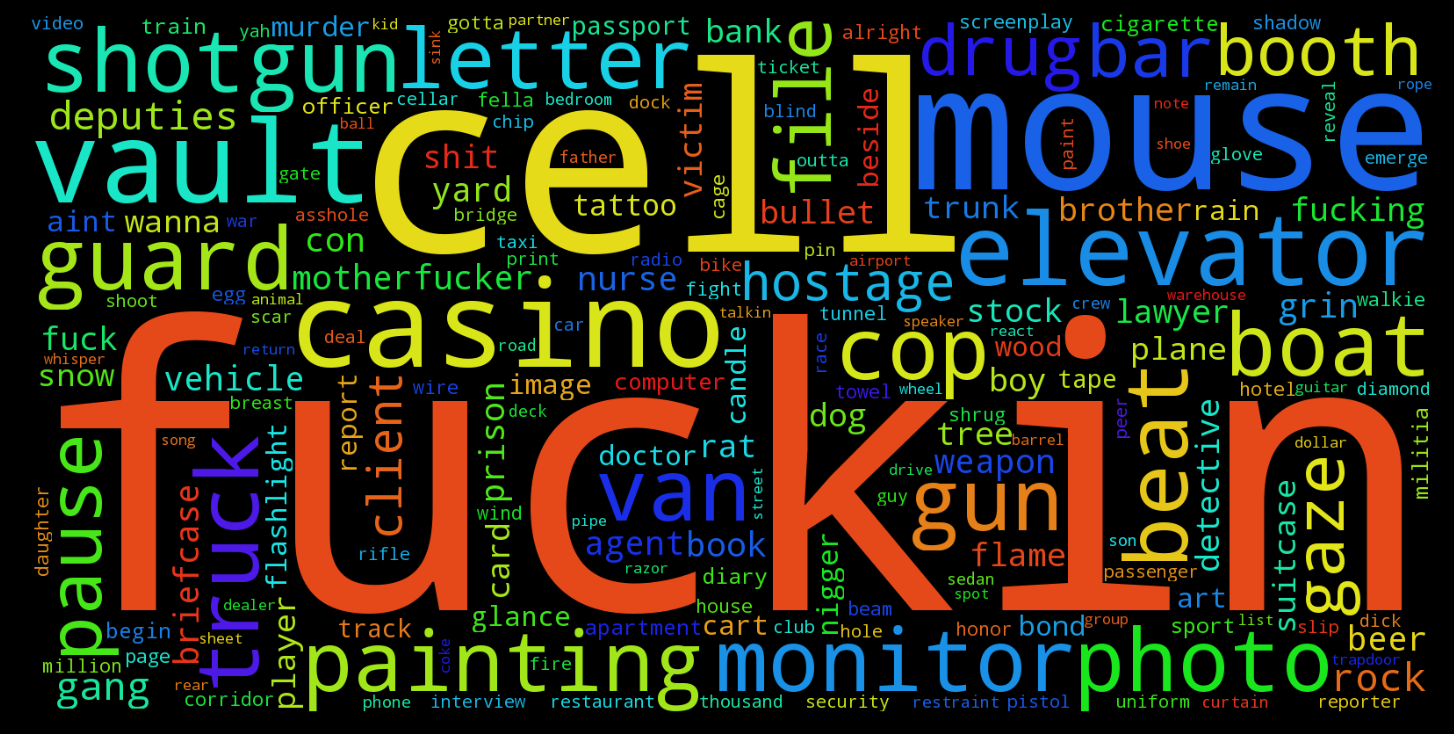

In [221]:
# Wordcloud image for Crime genre
wordcloud_tfidf("Crime")

Number of movie scripts in genre: 48
Movie scripts represented in the image: 
['Frozen (2013/I)', 'Bean (1997)', 'War of the Worlds (2005)', 'Despicable Me 2 (2013)', 'Up (2009)', 'Jurassic Park (1993)', 'Cars 2 (2011)', 'Thelma & Louise (1991)', 'Moonrise Kingdom (2012)', 'Mulan (1998)', 'The Abyss (1989)', 'ParaNorman (2012)', 'The Revenant (2015)', 'All About Steve (2009)', 'Shrek the Third (2007)', 'Dogma (1999)', 'Almost Famous (2000)', "The Hitchhiker's Guide to the Galaxy (2005)", 'Shrek (2001)', 'The Beach (2000/I)', 'Interstellar (2014)', 'Monte Carlo (2011)', 'Labyrinth (1986)', 'The Brothers Bloom (2008)', 'The Rescuers Down Under (1990)', 'Year One (2009)', 'Prometheus (2012/I)', 'Cold Mountain (2003)', 'Toy Story (1995)', 'Rise of the Guardians (2012)', 'Aladdin (1992)', 'Inglourious Basterds (2009)', 'Men in Black (1997)', 'True Grit (2010)', 'Fear and Loathing in Las Vegas (1998)', 'Big Fish (2003)', 'Anastasia (1997)', 'Finding Nemo (2003)', 'Antz (1998)', 'White Squall

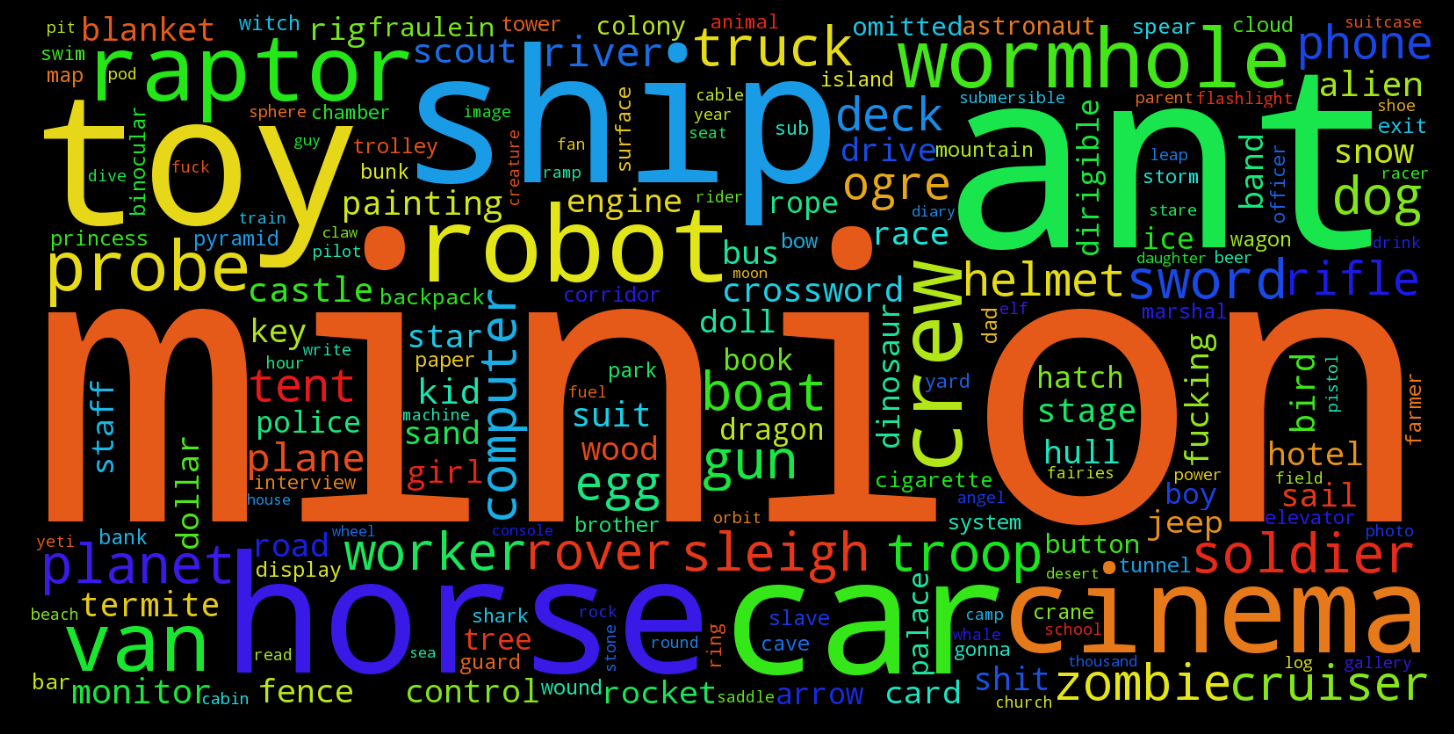

In [222]:
# Wordcloud image for Adventure genre
wordcloud_tfidf("Adventure")

Number of movie scripts in genre: 45
Movie scripts represented in the image: 
['Margin Call (2011)', "The King's Speech (2010)", 'The Iron Lady (2011)', 'Milk (2008/I)', 'Argo (2012)', 'Donnie Brasco (1997)', 'The Insider (1999)', 'Malcolm X (1992)', 'The Other Boleyn Girl (2008)', 'Fair Game (2010/I)', 'Gods and Monsters (1998)', 'Public Enemies (2009)', 'The Damned United (2009)', 'Basquiat (1996)', 'I Love You Phillip Morris (2009)', 'Foxcatcher (2014)', 'The Pianist (2002)', 'The Wolf of Wall Street (2013)', 'How to Lose Friends & Alienate People (2008)', 'Erin Brockovich (2000)', 'Confessions of a Dangerous Mind (2002)', 'Lincoln (2012)', 'Casino (1995)', 'Saving Mr. Banks (2013)', 'The Sessions (2012)', 'Braveheart (1995)', 'Man on the Moon (1999)', 'Blow (2001)', 'The Queen (2006)', 'Awakenings (1990)', 'Moneyball (2011)', 'Creation (2009/I)', 'Capote (2005)', 'The Blind Side (2009)', 'American Gangster (2007)', '12 Years a Slave (2013)', 'My Week with Marilyn (2011)', 'The Soci

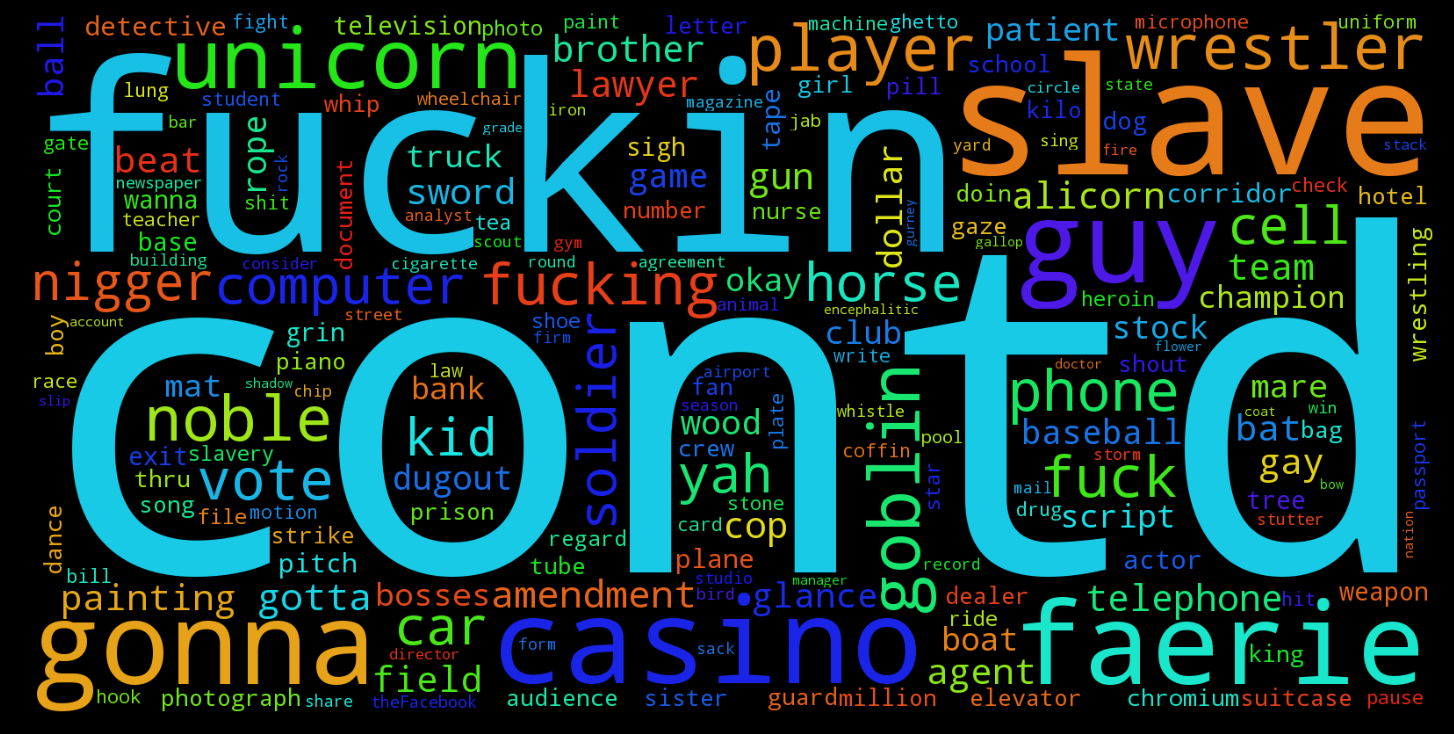

In [223]:
# Wordcloud image for Biography genre
wordcloud_tfidf("Biography")

Number of movie scripts in genre: 31
Movie scripts represented in the image: 
['I Spit on Your Grave (2010)', 'The Cell (2000)', 'They (2002)', 'The Relic (1997)', 'The Ruins (2008)', 'Cherry Falls (2000)', 'Saw (2004)', 'House of 1000 Corpses (2003)', 'The Thing (2011/I)', 'Mimic (1997)', 'Mirrors (2008/I)', 'Prom Night (2008/I)', 'I Still Know What You Did Last Summer (1998)', 'Lord of Illusions (1995)', 'Case 39 (2009)', 'Scream 2 (1997)', 'Event Horizon (1997)', 'Psycho (1998)', 'Final Destination (2000)', 'Stir of Echoes (1999)', 'Ghost Ship (2002)', 'When a Stranger Calls (2006)', 'Alone in the Dark (2005)', 'Friday the 13th (2009)', 'The Hills Have Eyes (2006)', 'Scream 3 (2000)', 'Final Destination 2 (2003)', 'Insidious (2010/I)', 'The Grudge (2004)', 'Pet Sematary (1989)', 'Scream (1996)']


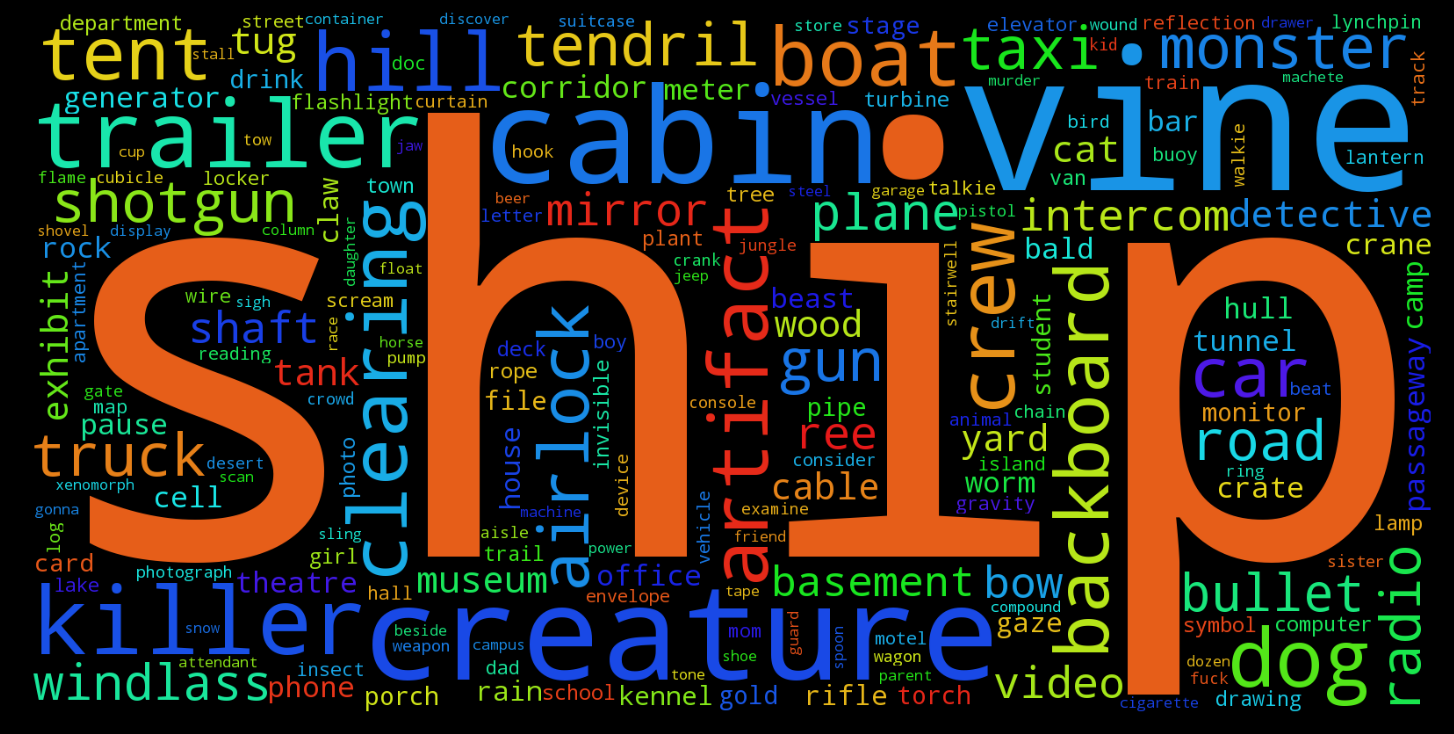

In [224]:
# Wordcloud image for Horror genre
wordcloud_tfidf("Horror")

Number of movie scripts in genre: 10
Movie scripts represented in the image: 
['S. Darko (2009)', '8MM (1999)', 'Source Code (2011)', 'Chronicle (2012)', 'Memento (2000)', 'Limitless (2011/I)', 'Angels & Demons (2009)', 'Color of Night (1994)', 'Lost Highway (1997)', 'Super 8 (2011)']


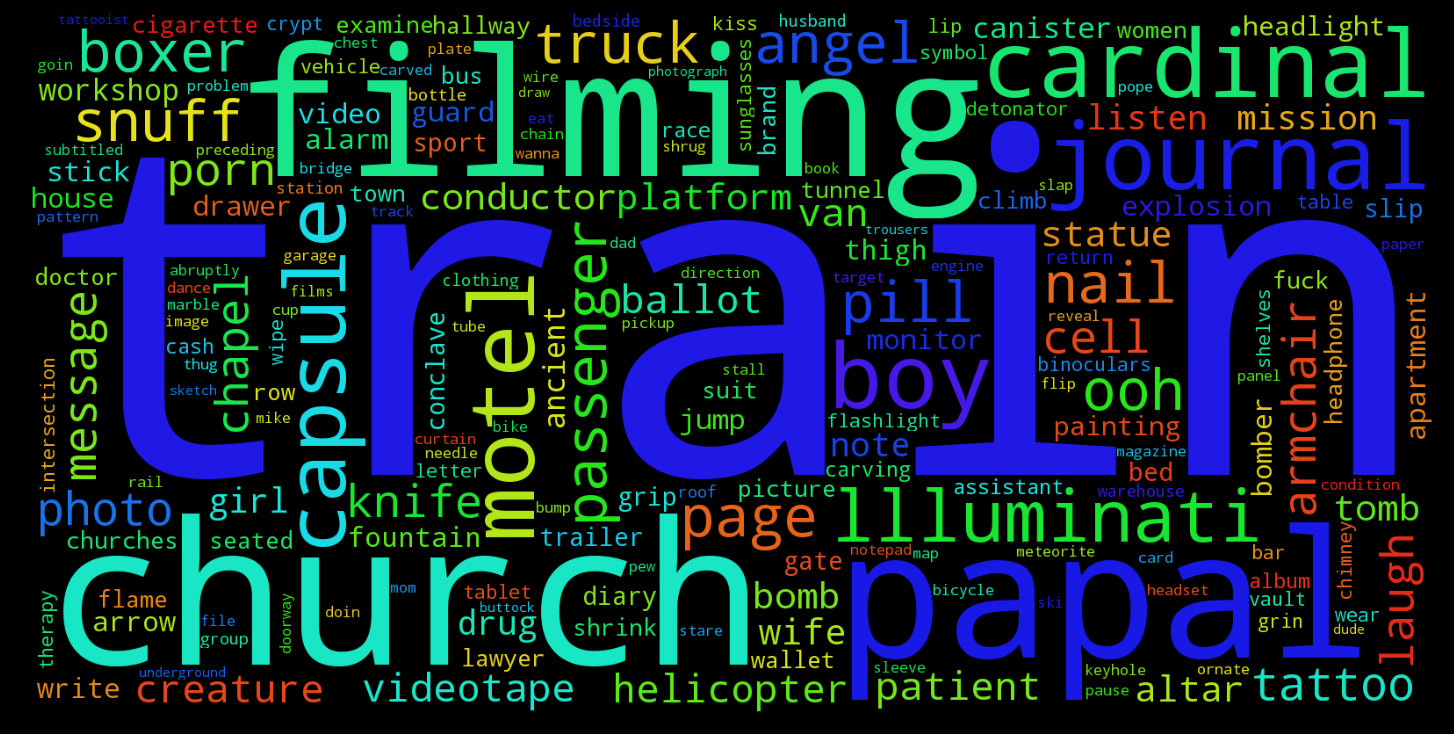

In [225]:
# Wordcloud image for Mystery genre
wordcloud_tfidf("Mystery")